In [1]:
#Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()

### Load data file

In [2]:
wb = pandas.read_csv('data/wellbeingSample.csv')
wb

,ID_code,College,Subject,Score_preVac,Score_postVac
0,247610,Lonsdale,PPE,60,35
1,448590,Lonsdale,PPE,43,44
2,491100,Lonsdale,engineering,79,69
3,316150,Lonsdale,PPE,55,61
4,251870,Lonsdale,engineering,62,65
...,...,...,...,...,...
296,440570,Beaufort,history,75,70
297,826030,Beaufort,maths,52,49
298,856260,Beaufort,Biology,83,84
299,947060,Beaufort,engineering,62,65


# bootstrap confidence interval for $r$

n = 122
r = 0.7885617453168887


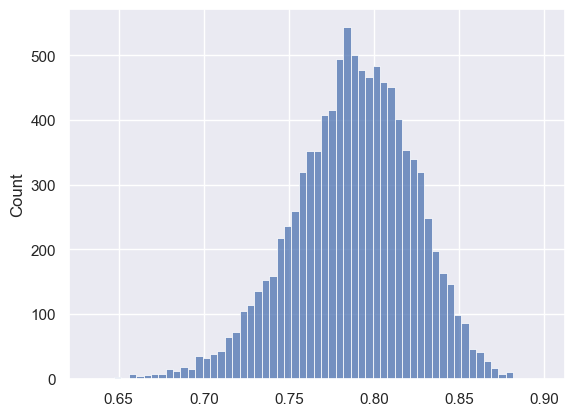

In [3]:
# my best effort in Python - horribly clunky!

nReps=10000
c=np.empty(nReps)
n=len(wb[wb['College']=='Lonsdale'])
print('n = ' + str(n))

# how we got correlation before (already clunky!)
print('r = ' + str(wb[wb['College']=='Lonsdale']['Score_preVac'].corr(wb[wb['College']=='Lonsdale']['Score_postVac'])))
    # convert to a numpy array)
    # convert to a numpy array

for i in range(nReps):
    # first grab just the data values from Lonsdale 
    bitWeNeed = wb[wb['College']=='Lonsdale'][['Score_preVac','Score_postVac']]
    # convert to a numpy array
    data = bitWeNeed.to_numpy()
    # bootstrap selection of rows
    ix= np.random.choice(range(n),n,replace=True)
    # bootstrap sample
    sample = data[ix]
    # bootstrp correlation
    tmp=np.corrcoef(sample[:,0],sample[:,1])
    c[i]=tmp[0,1]

sns.histplot(c)
plt.show()

How I would do that in MATLAB (not clunky!):



<tt>
    
[data is a matrix 122x2 (columns are wb scores pre and post vac)]

for i=1:nReps
    
    ix= randi([1,122],122,1) # 122x1 vector of random integers between 1 and 122 (with replacement)
    
    c(i)=corr(data(ix,1),data(ix,2))
    
end

hist(c)
</tt>